In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from Bio.SeqUtils import GC
plt.style.use('ggplot')
import importlib
import Module.cnv as cnv
importlib.reload(cnv)


<module 'Module.cnv' from '/home/sedra/Intership/cnv/Module/cnv.py'>

In [2]:
mixed_counts_df = pd.read_csv('/home/sedra/Intership/mm_liver_met.csv')
bin_df = pd.read_csv(r'/home/sedra/Intership/mm10_1Mb_bins.txt', sep = '\s+')
normal_counts_df = pd.read_csv('/home/sedra/Intership/cnv/Module/normal.csv')

In [3]:
indices = cnv.index_of_chr(bin_df, "chr_ind", "bin_start")

In [4]:
chr1 = (SeqIO.read("chr1.fna", "fasta")).seq
chr2 = (SeqIO.read("chr2.fna", "fasta")).seq
chr3 = (SeqIO.read("chr3.fna", "fasta")).seq
print(3)
chr4 = (SeqIO.read("chr4.fna", "fasta")).seq
chr5 = (SeqIO.read("chr5.fna", "fasta")).seq
chr6 = (SeqIO.read("chr6.fna", "fasta")).seq
chr7 = (SeqIO.read("chr7.fna", "fasta")).seq
chr8 = (SeqIO.read("chr8.fna", "fasta")).seq
chr9 = (SeqIO.read("chr9.fna", "fasta")).seq
print(9)
chr10 = (SeqIO.read("chr10.fna", "fasta")).seq
chr11 = (SeqIO.read("chr11.fna", "fasta")).seq
chr12 = (SeqIO.read("chr12.fna", "fasta")).seq
chr13 = (SeqIO.read("chr13.fna", "fasta")).seq
chr14 = (SeqIO.read("chr14.fna", "fasta")).seq
chr15 = (SeqIO.read("chr15.fna", "fasta")).seq
chr16 = (SeqIO.read("chr16.fna", "fasta")).seq
chr17 = (SeqIO.read("chr17.fna", "fasta")).seq
chr18 = (SeqIO.read("chr18.fna", "fasta")).seq
chr19 = (SeqIO.read("chr19.fna", "fasta")).seq
print(19)
chrX = (SeqIO.read("chrX.fna", "fasta")).seq
chrY = (SeqIO.read("chrY.fna", "fasta")).seq
chrM = (SeqIO.read("chrMT.fna", "fasta")).seq
print("done!")

3
9
19
done!


In [5]:
chr_list = [chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,
            chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chrX,chrY,chrM]


In [6]:
gc_content = cnv.countCGall(chr_list,indices,bin_df)

In [12]:
cg_content1 = cnv.countCGall1(chr_list,indices,bin_df)

In [7]:
bin_df['GC_content'] = gc_content 
bin_df['GC_content1'] = cg_content1 

In [8]:
copy_df = pd.merge(bin_df, mixed_counts_df, on = 'bin_ind', how = 'inner')
copy_df = pd.merge(copy_df, normal_counts_df, on = 'bin_ind', how = 'inner')
copy_df = copy_df.rename({'0': 'normal_counts'}, axis = 1)
copy_df['normalised_counts'] = copy_df['counts']/copy_df['normal_counts']

In [9]:
copy_df = copy_df.drop(copy_df[copy_df.GC_content == 0].index)
copy_df = copy_df.drop(copy_df[copy_df.counts > 10000].index)

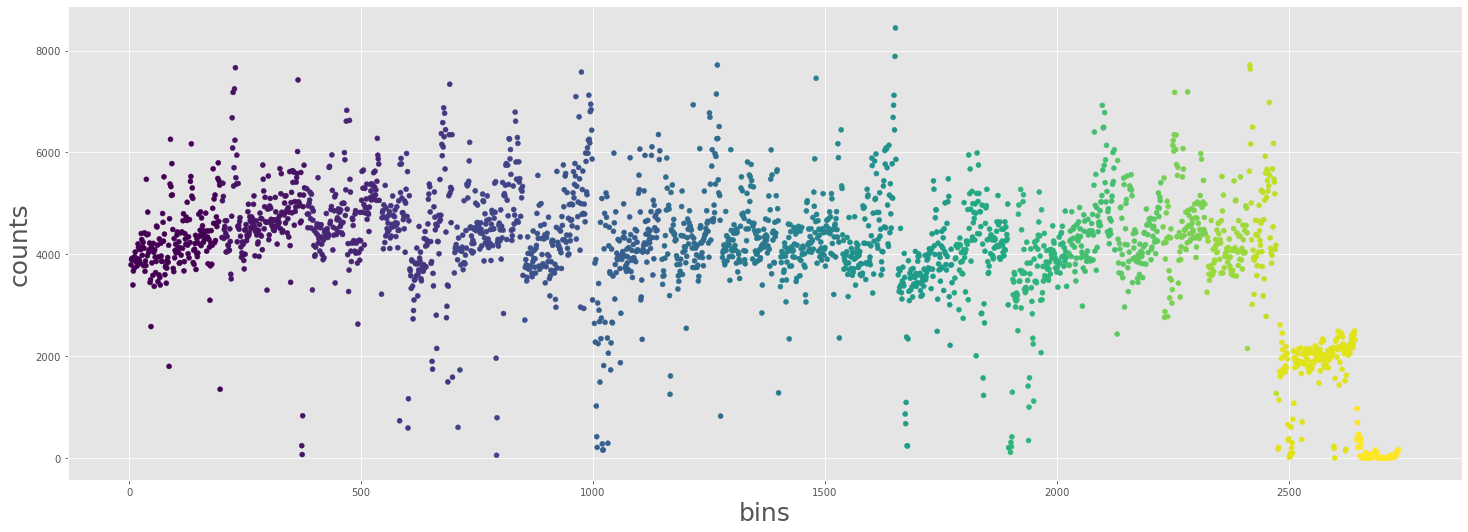

<Figure size 216x72 with 0 Axes>

In [17]:
primary_plot = plt.scatter(copy_df['bin_ind'], copy_df['counts'], c = copy_df['chr_ind'],s = 25)
plt.rcParams["figure.figsize"] = [20.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('bins', size = 25)
plt.ylabel('counts', size = 25)
plt.figure(figsize=(3, 1))
plt.show()

In [12]:
cnv.add_column(copy_df,"mean_normalised_normal_counts")
cnv.add_column(copy_df,"median_normalised_normal_counts")
cnv.add_column(copy_df,"mode_normalised_normal_counts")
cnv.add_column(copy_df,"mean_normalised_mixed_counts")
cnv.add_column(copy_df,"median_normalised_mixed_counts")
cnv.add_column(copy_df,"mode_normalised_mixed_counts")

In [13]:
cnv.normalise_to_fixed_value(copy_df,copy_df['normal_counts'] ,"mean","_normal") 
cnv.normalise_to_fixed_value(copy_df,copy_df['normal_counts'] ,"median","_normal")  
cnv.normalise_to_fixed_value(copy_df,copy_df['normal_counts'] ,"mode","_normal") 
cnv.normalise_to_fixed_value(copy_df,copy_df['counts'] ,"mean","_mixed") 
cnv.normalise_to_fixed_value(copy_df,copy_df['counts'] ,"median","_mixed")  
cnv.normalise_to_fixed_value(copy_df,copy_df['counts'] ,"mode","_mixed")

[]

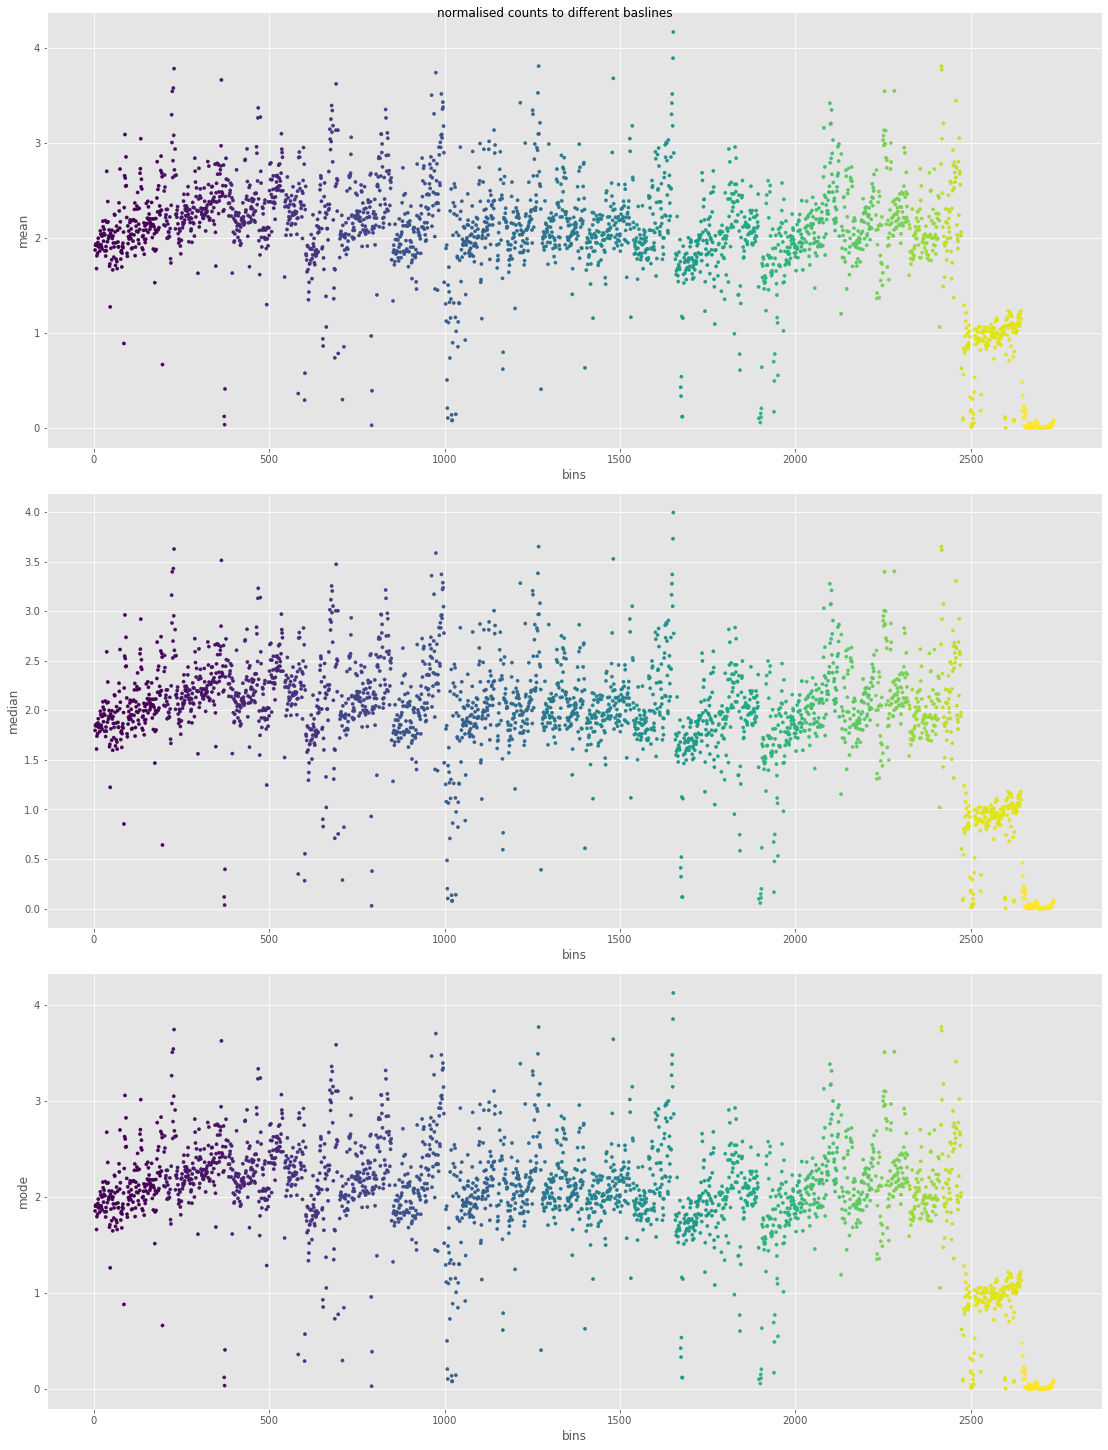

In [44]:
fig0, axs0 = plt.subplots(3)
fig0.suptitle('normalised counts to different baslines')
axs0[0].scatter(copy_df['bin_ind'], copy_df['mean_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs0[1].scatter(copy_df['bin_ind'], copy_df['median_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs0[2].scatter(copy_df['bin_ind'], copy_df['mode_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs0[0].set(xlabel='bins', ylabel = 'mean counts')
axs0[1].set(xlabel='bins', ylabel = 'median counts')
axs0[2].set(xlabel='bins', ylabel = 'mode counts')

plt.rcParams["figure.figsize"] = [15.50, 20.50]
plt.rcParams["figure.autolayout"] = True
plt.plot()


In [15]:
copy_df = copy_df.drop(copy_df[copy_df.chr_ind== 20].index)
copy_df = copy_df.drop(copy_df[copy_df.chr_ind == 21].index)
copy_df


,chr,bin_start,bin_end,bin_len,chr_ind,bin_ind,GC_content,counts,normal_counts,normalised_counts,mean_normalised_normal_counts,median_normalised_normal_counts,mode_normalised_normal_counts,mean_normalised_mixed_counts,median_normalised_mixed_counts,mode_normalised_mixed_counts
0,chr1,3000000,4000000,1000000,1,4,0.386435,3797,2239,1.695846,1.755088,1.765077,1.772062,1.743441,1.757057,1.856043
1,chr1,4000000,5000000,1000000,1,5,0.399599,3898,2322,1.678725,1.820149,1.830508,1.837752,1.789816,1.803795,1.905414
2,chr1,5000000,6000000,1000000,1,6,0.395048,3925,2326,1.687446,1.823285,1.833662,1.840918,1.802214,1.816289,1.918612
3,chr1,6000000,7000000,1000000,1,7,0.394995,3905,2336,1.671661,1.831124,1.841545,1.848833,1.793030,1.807034,1.908835
4,chr1,7000000,8000000,1000000,1,8,0.392176,3401,2074,1.639826,1.625749,1.635002,1.641472,1.561612,1.573808,1.662471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,chr19,57000000,58000000,1000000,19,2469,0.440432,5419,3170,1.709464,2.484872,2.499015,2.508904,2.488203,2.507635,2.648906
2411,chr19,58000000,59000000,1000000,19,2470,0.450388,5190,3252,1.595941,2.549150,2.563658,2.573803,2.383055,2.401666,2.536967
2412,chr19,59000000,60000000,1000000,19,2471,0.436703,4101,2485,1.650302,1.947920,1.959007,1.966759,1.883026,1.897733,2.004644
2413,chr19,60000000,61000000,1000000,19,2472,0.417897,4181,2528,1.653877,1.981627,1.992905,2.000791,1.919759,1.934752,2.043749


[]

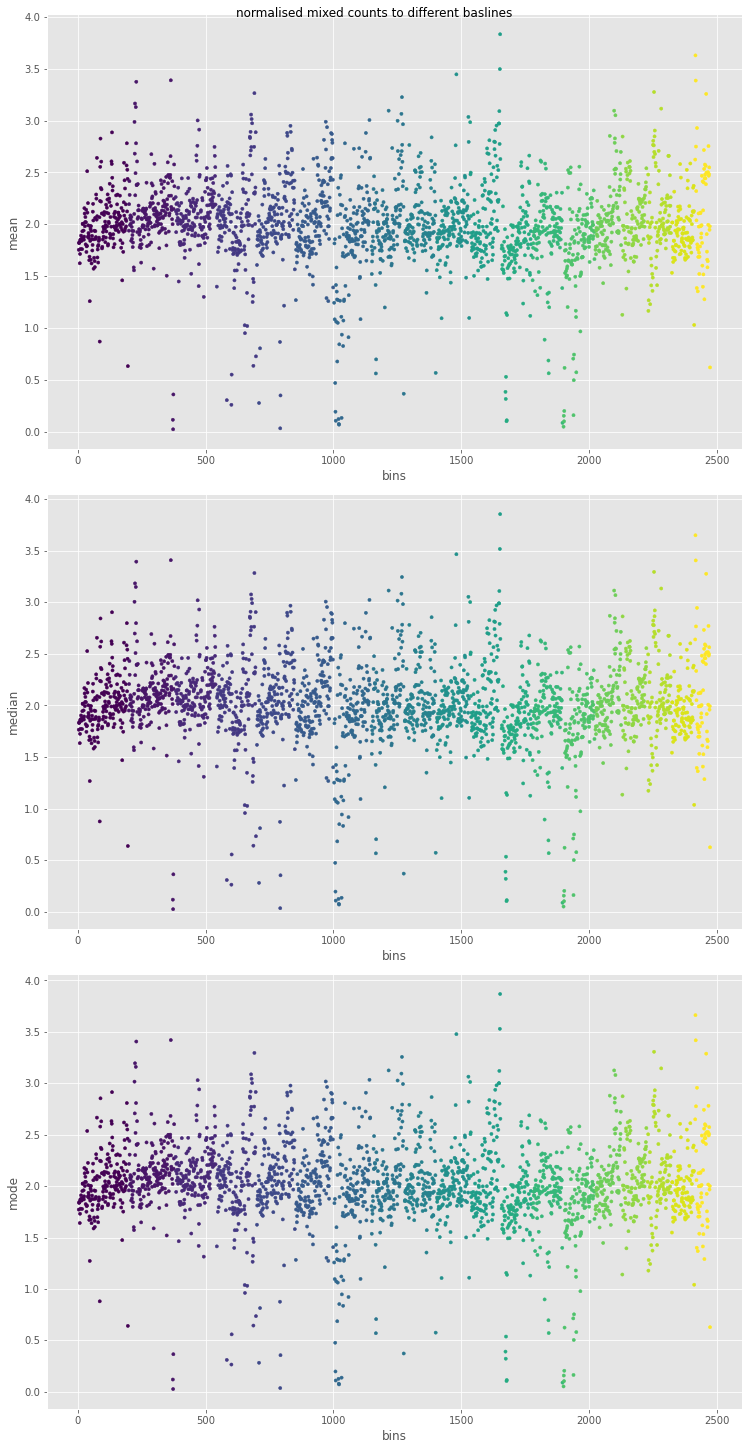

In [17]:
fig1, axs1 = plt.subplots(3)
fig1.suptitle('normalised mixed counts to different baslines')
axs1[0].scatter(copy_df['bin_ind'], copy_df['mean_normalised_normal_counts'],
                c = copy_df['chr_ind'],s = 10)
axs1[1].scatter(copy_df['bin_ind'], copy_df['median_normalised_normal_counts'],
                c = copy_df['chr_ind'],s = 10)
axs1[2].scatter(copy_df['bin_ind'], copy_df['mode_normalised_normal_counts'],
                c = copy_df['chr_ind'],s = 10)
axs1[0].set(xlabel='bins', ylabel = 'mean')
axs1[1].set(xlabel='bins', ylabel = 'median')
axs1[2].set(xlabel='bins', ylabel = 'mode')

plt.rcParams["figure.figsize"] = [10.50, 20.50]
plt.rcParams["figure.autolayout"] = True
plt.plot()

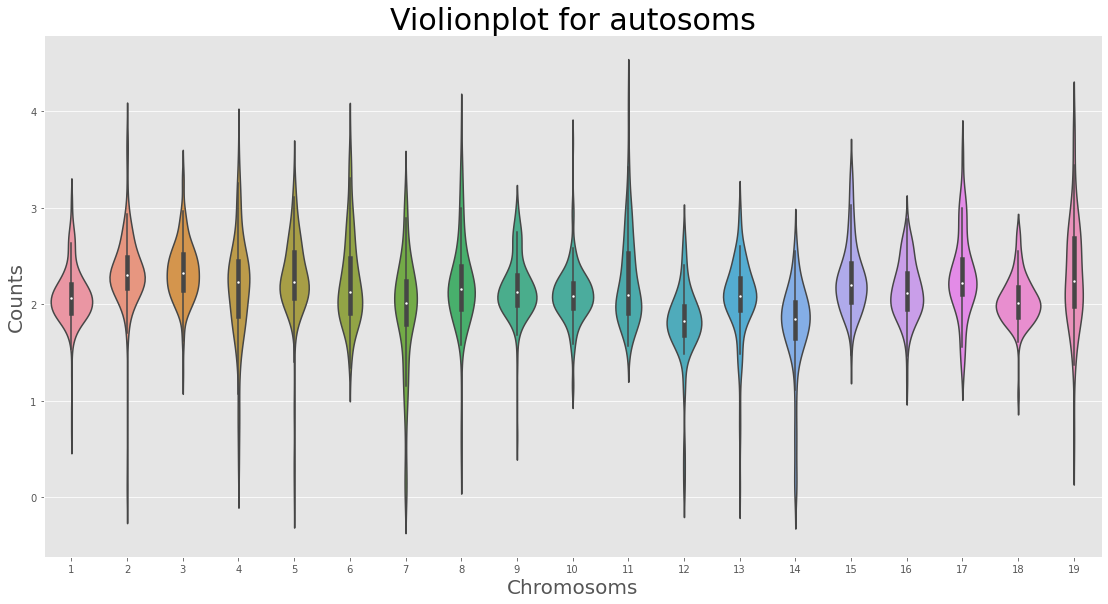

In [54]:
fig2 = sns.violinplot(x = copy_df.chr_ind , y = copy_df.mean_normalised_counts)
fig2.set_title('Violionplot for autosoms',fontsize = 30)
plt.xlabel("Chromosoms", size = 20)
plt.ylabel("Counts", size = 20)
plt.rcParams["figure.figsize"] = [15.50, 8.50]
plt.rcParams["figure.autolayout"] = True
plt.show()

here we plot hte normal counts and the mixed counts 

[]

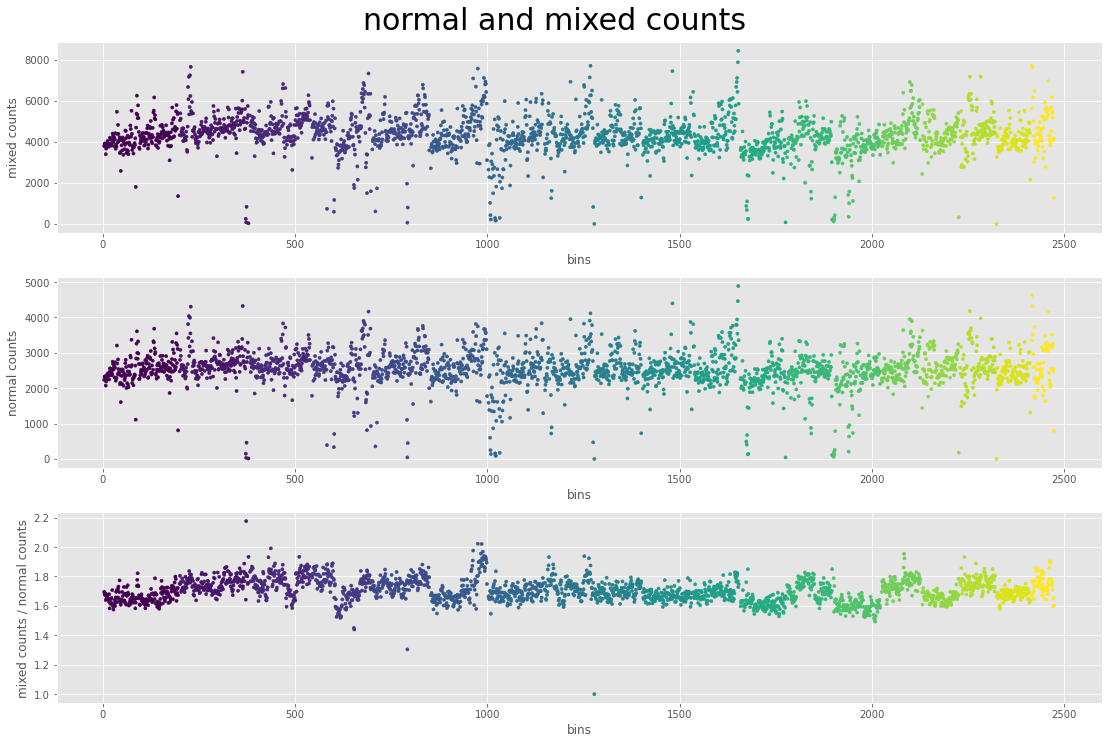

In [15]:
fig11, axs11 = plt.subplots(3)
fig11.suptitle('normal and mixed counts',fontsize = 30)
axs11[0].scatter(copy_df['bin_ind'], copy_df['counts'],
                c = copy_df['chr_ind'],s = 10)
axs11[1].scatter(copy_df['bin_ind'], copy_df['normal_counts'],
                c = copy_df['chr_ind'],s = 10)

axs11[2].scatter(copy_df['bin_ind'], copy_df['normalised_counts'],
                c = copy_df['chr_ind'],s = 10)

axs11[0].set(xlabel='bins', ylabel = 'mixed counts')
axs11[1].set(xlabel='bins', ylabel = 'normal counts')
axs11[2].set(xlabel='bins', ylabel = 'mixed counts / normal counts')


plt.rcParams["figure.figsize"] = [15.50, 10.50]
plt.rcParams["figure.autolayout"] = True
plt.plot()

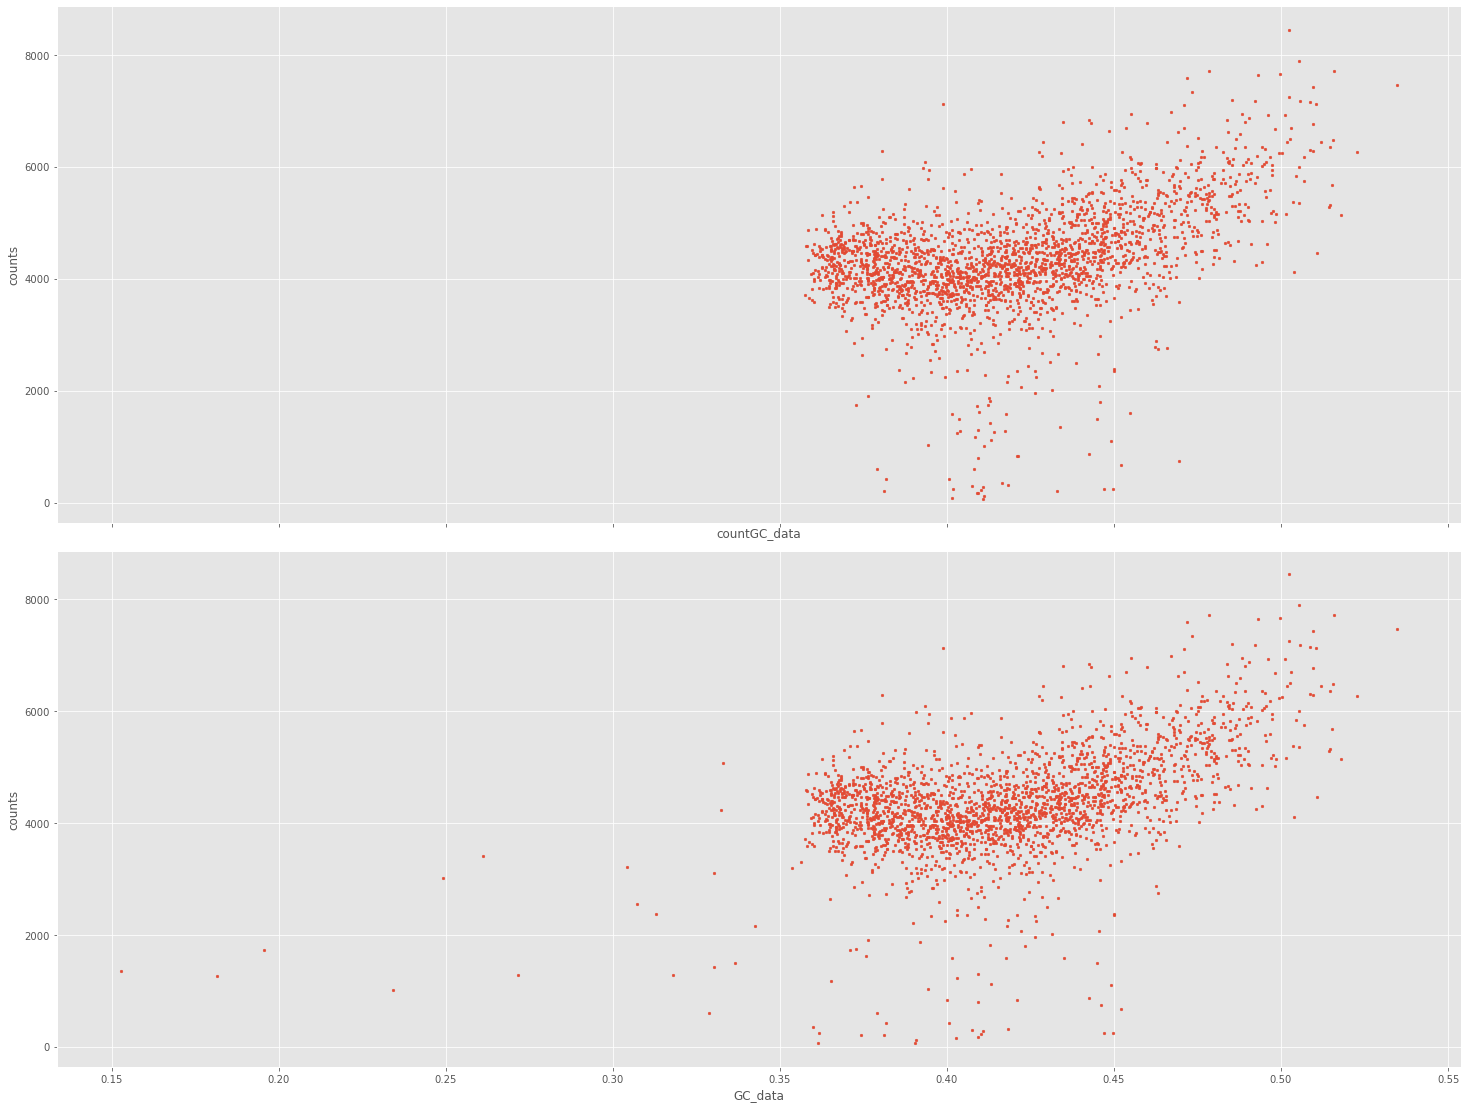

In [163]:
fig3, axs3 =  plt.subplots(nrows = 2, ncols = 1, sharex = True)
axs3[0].scatter(copy_df['GC_content'], copy_df['counts'], s = 7)
axs3[1].scatter(copy_df['GC_content1'] / 100,copy_df['counts'], s = 7)
axs3[0].set(xlabel='countGC_data', ylabel='counts')
axs3[1].set(xlabel='GC_data', ylabel='counts')
plt.show()

we have some outliers in the second plot,a nd it's better not to include the N bases in the calculations -> we continue with ch_content 

In [ ]:
copy_df = copy_df.drop('GC_content1',axis=1)

Gc_content in both mixed and normal counts

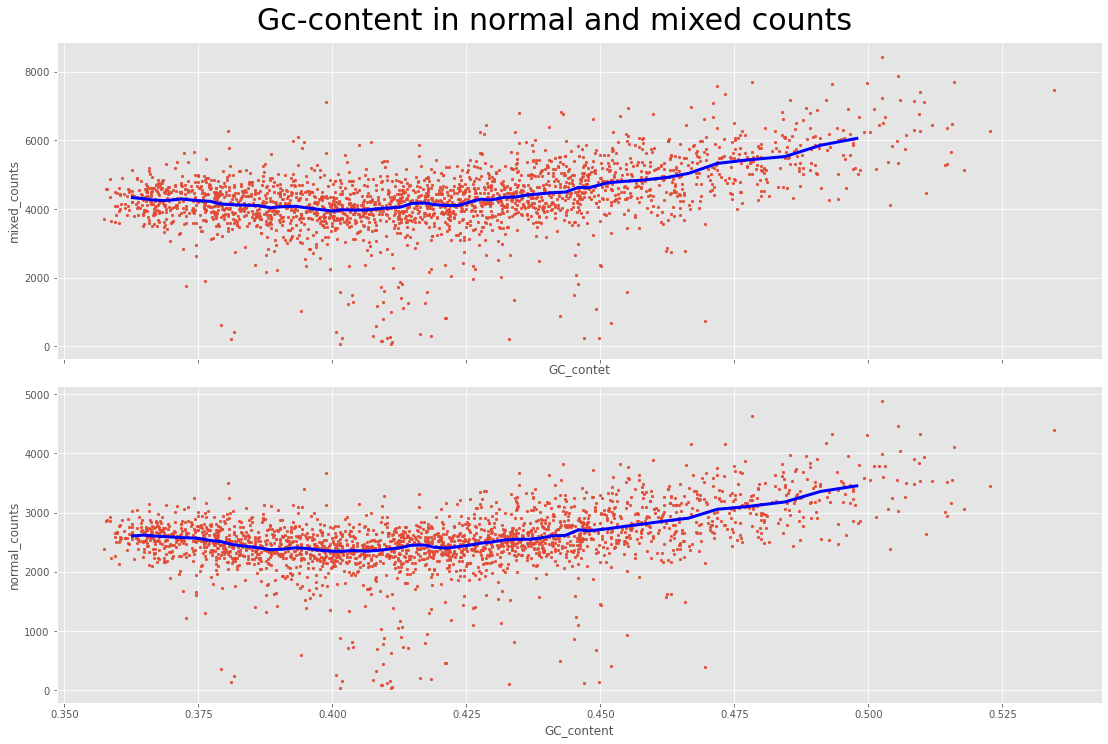

In [14]:
mixed_counts = []
cg_mixed = []
s  = copy_df.sort_values("GC_content",ignore_index=True)
for i in range (0,2450,50):
    mixed_counts.append(s.loc[(i-70):(i+70)].counts.median())
    cg_mixed.append(s.loc[(i-70):(i+70)].GC_content.median())
    
normal_counts = []
cg_normal = []
for i in range (0,2450,50):
    normal_counts.append(s.loc[(i-70):(i+70)].normal_counts.median())
    cg_normal.append(s.loc[(i-70):(i+70)].GC_content.median())
    
fig7, axs7 =  plt.subplots(nrows = 2, ncols = 1, sharex = True)
fig7.suptitle('Gc-content in normal and mixed counts',fontsize = 30)
axs7[0].scatter(copy_df['GC_content'], copy_df['counts'], s = 7)
axs7[0].plot(cg_mixed, mixed_counts,color="b",linewidth=3.0)
axs7[1].scatter(copy_df['GC_content'],copy_df['normal_counts'], s = 7)
axs7[1].plot(cg_normal, normal_counts,color="b",linewidth=3.0)
axs7[0].set(xlabel='GC_contet', ylabel='mixed_counts')
axs7[1].set(xlabel='GC_content', ylabel='normal_counts')
plt.rcParams["figure.figsize"] = [15.50, 10.50]

plt.rcParams["figure.autolayout"] = True
plt.show()

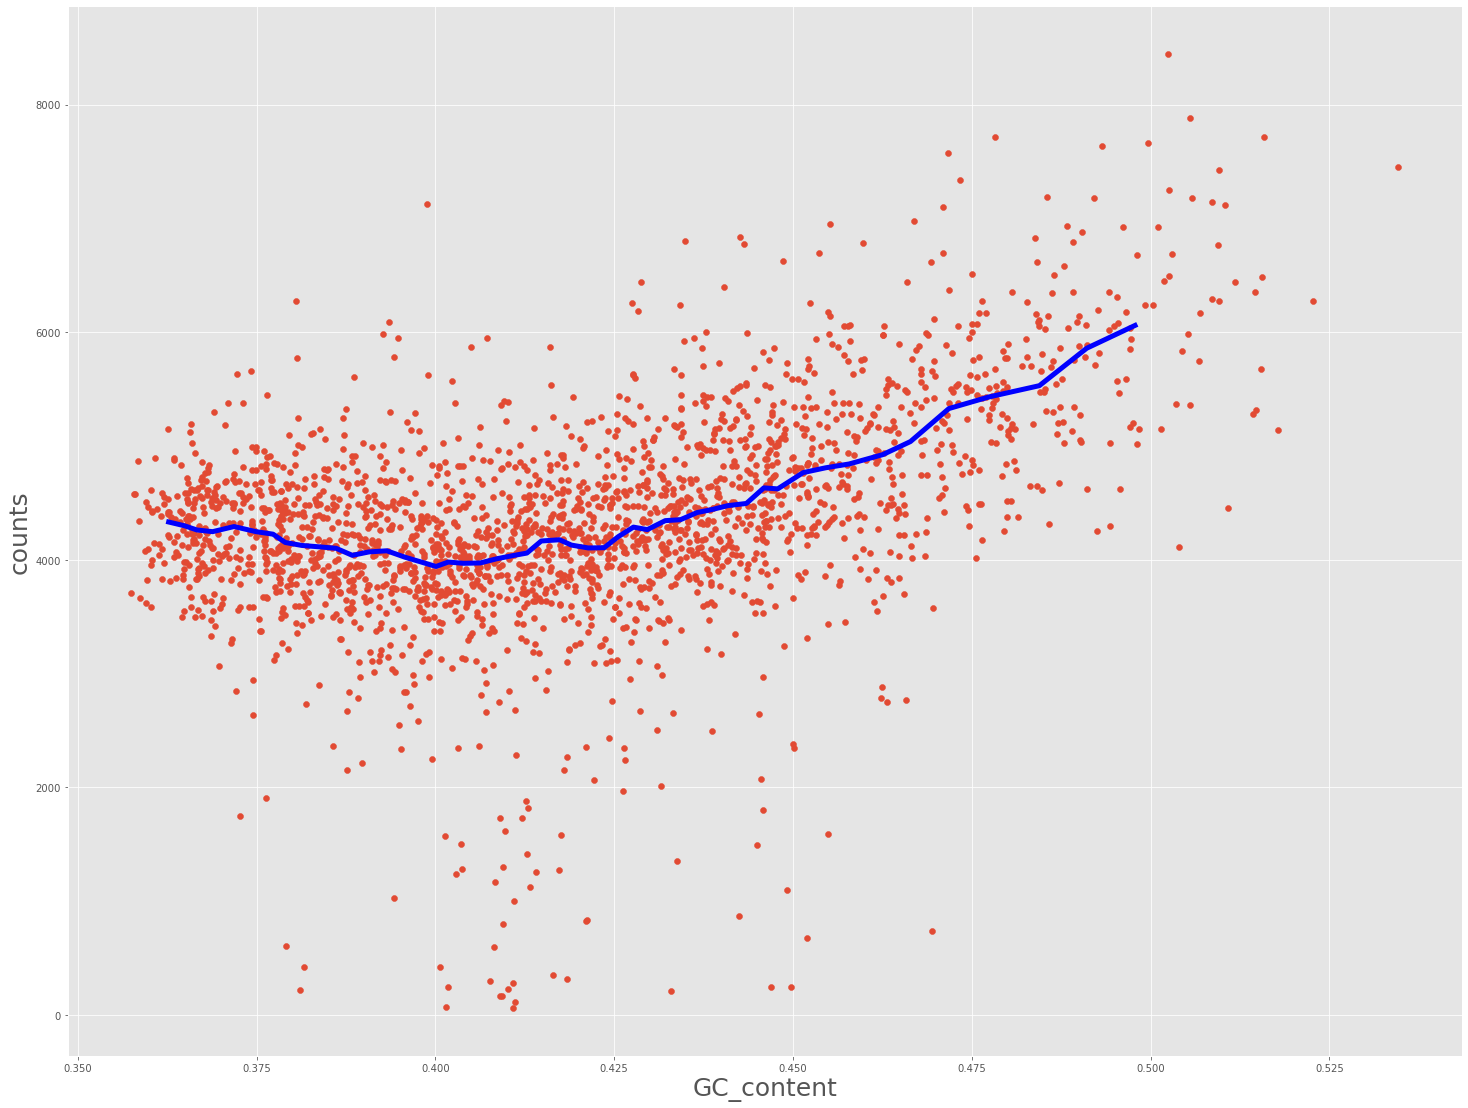

<Figure size 216x72 with 0 Axes>

In [45]:
counts = []
cg = []
s  = copy_df.sort_values("GC_content",ignore_index=True)
for i in range (0,2450,50):
    counts.append(s.loc[(i-70):(i+70)].counts.median())
    cg.append(s.loc[(i-70):(i+70)].GC_content.median())
    
fig44 = plt.scatter(copy_df['GC_content'],copy_df['counts'])
plt.plot(cg, counts,color="b",linewidth=5.0)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('GC_content', size = 25)
plt.ylabel('counts', size = 25)
plt.figure(figsize=(3, 1))
plt.show()

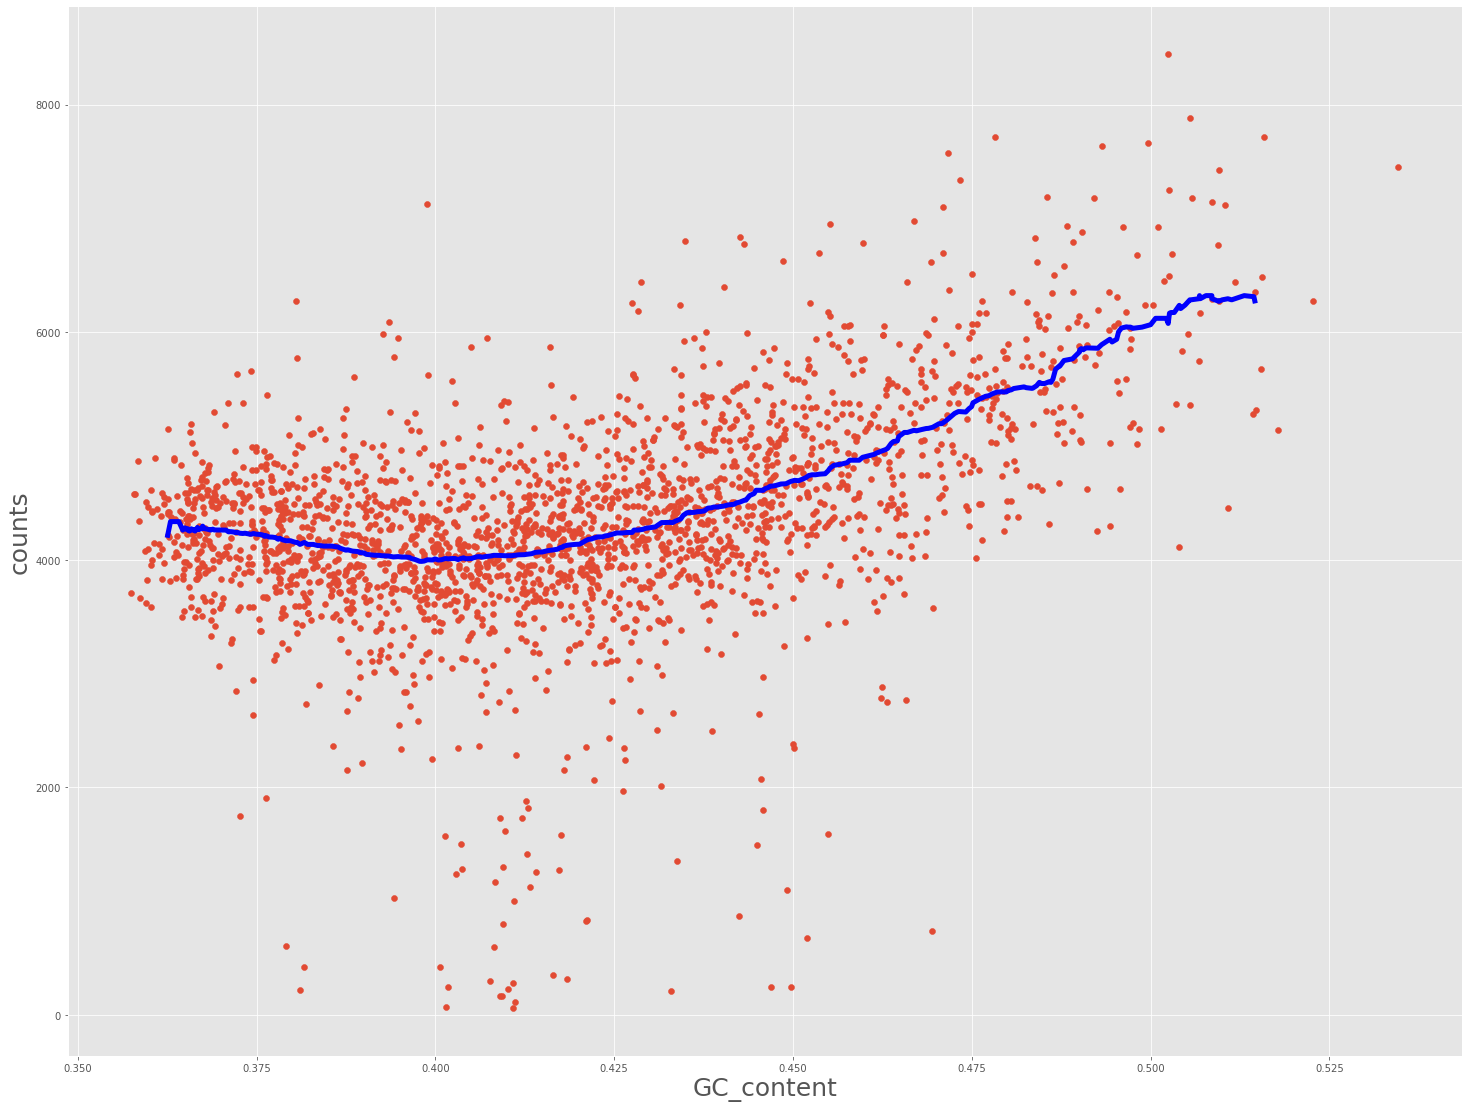

<Figure size 216x72 with 0 Axes>

In [16]:
median_counts = []
cg_window = []
for i in range (3500,5200,5):
    median_counts.append(copy_df.loc[(copy_df.GC_content >= (i/10000)-0.01) &
                                     (copy_df.GC_content <= (i/10000)+0.015)].counts.median())
    cg_window.append(copy_df.loc[(copy_df.GC_content >= (i/10000)-0.01) &
                                     (copy_df.GC_content <= (i/10000)+0.015)].GC_content.median())
    
fig4 = plt.scatter(copy_df['GC_content'],copy_df['counts'])
plt.plot(cg_window, median_counts,color="b",linewidth=5.0)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('GC_content', size = 25)
plt.ylabel('counts', size = 25)
plt.figure(figsize=(3, 1))
plt.show()

In [18]:
#cnv.add_column(copy_df,"gc_normlised_mixed_counts")
cnv.gc_correction(copy_df,copy_df.GC_content,3450,5200,5,10000,0.02)
cnv.gc_ncorrection(copy_df,copy_df.GC_content,3450,5200,5,10000,0.02)


In [19]:
copy_df

,chr,bin_start,bin_end,bin_len,chr_ind,bin_ind,GC_content,counts,normal_counts,normalised_counts,mean_normalised_normal_counts,median_normalised_normal_counts,mode_normalised_normal_counts,mean_normalised_mixed_counts,median_normalised_mixed_counts,mode_normalised_mixed_counts,gc_normlised_mixed_counts,gc_normalised_normal_counts
0,chr1,3000000,4000000,1000000,1,4,0.386435,3797,2239,1.695846,1.755088,1.765077,1.772062,1.743441,1.757057,1.856043,1.851518,1.828128
1,chr1,4000000,5000000,1000000,1,5,0.399599,3898,2322,1.678725,1.820149,1.830508,1.837752,1.789816,1.803795,1.905414,1.952417,1.964467
2,chr1,5000000,6000000,1000000,1,6,0.395048,3925,2326,1.687446,1.823285,1.833662,1.840918,1.802214,1.816289,1.918612,1.966679,1.966188
3,chr1,6000000,7000000,1000000,1,7,0.394995,3905,2336,1.671661,1.831124,1.841545,1.848833,1.793030,1.807034,1.908835,1.950549,1.972973
4,chr1,7000000,8000000,1000000,1,8,0.392176,3401,2074,1.639826,1.625749,1.635002,1.641472,1.561612,1.573808,1.662471,1.684080,1.740663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,chr19,57000000,58000000,1000000,19,2469,0.440432,5419,3170,1.709464,2.484872,2.499015,2.508904,2.488203,2.507635,2.648906,2.430045,2.440339
2411,chr19,58000000,59000000,1000000,19,2470,0.450388,5190,3252,1.595941,2.549150,2.563658,2.573803,2.383055,2.401666,2.536967,2.223412,2.385476
2412,chr19,59000000,60000000,1000000,19,2471,0.436703,4101,2485,1.650302,1.947920,1.959007,1.966759,1.883026,1.897733,2.004644,1.857968,1.942924
2413,chr19,60000000,61000000,1000000,19,2472,0.417897,4181,2528,1.653877,1.981627,1.992905,2.000791,1.919759,1.934752,2.043749,2.036532,2.097055


In [20]:
copy_df['gc_normlised_counts'] = copy_df['gc_normlised_mixed_counts']/copy_df['gc_normalised_normal_counts']

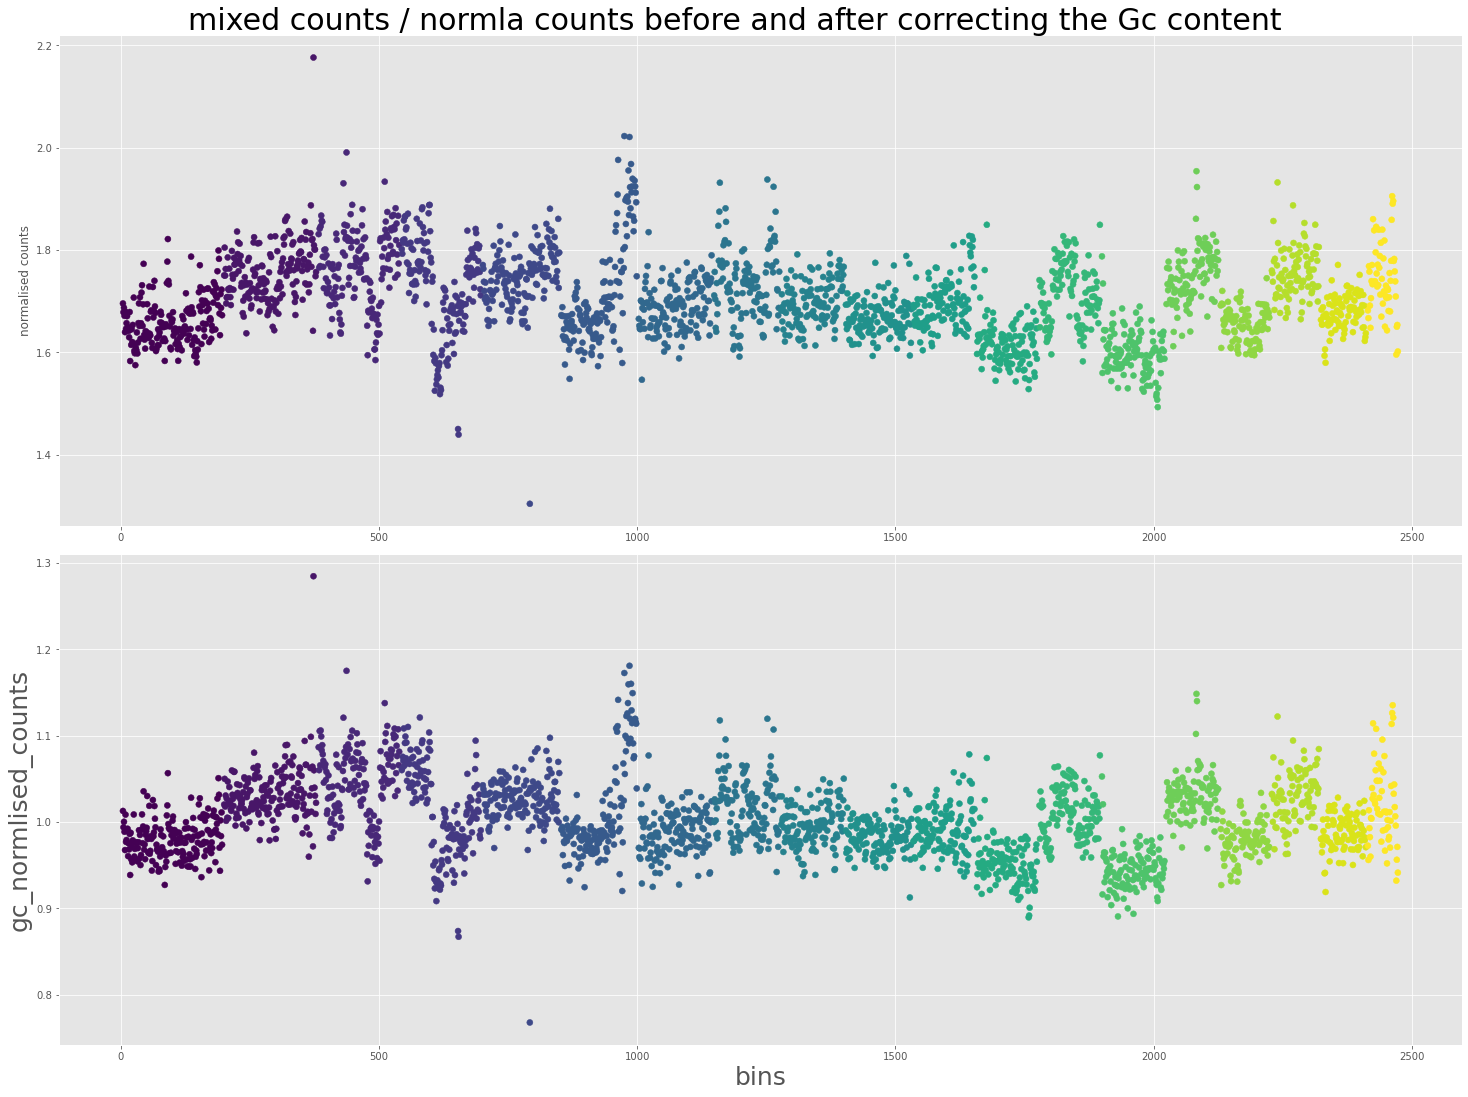

<Figure size 216x72 with 0 Axes>

In [27]:
fig55, axs55 = plt.subplots(2)
fig55.suptitle('mixed counts / normla counts before and after correcting the Gc content',fontsize = 30)
axs55[0].scatter(copy_df['bin_ind'], copy_df['normalised_counts'], c = copy_df['chr_ind'])
axs55[1].scatter(copy_df['bin_ind'], copy_df['gc_normlised_counts'], c = copy_df['chr_ind'])
axs55[0].set(xlabel='', ylabel='normalised counts')
axs55[1].set(xlabel='', ylabel='gc_corrected normalised counts')

plt.rcParams["figure.figsize"] = [20.50, 15.5]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('bins', size = 25)

plt.figure(figsize=(3, 1))
plt.show()

[]

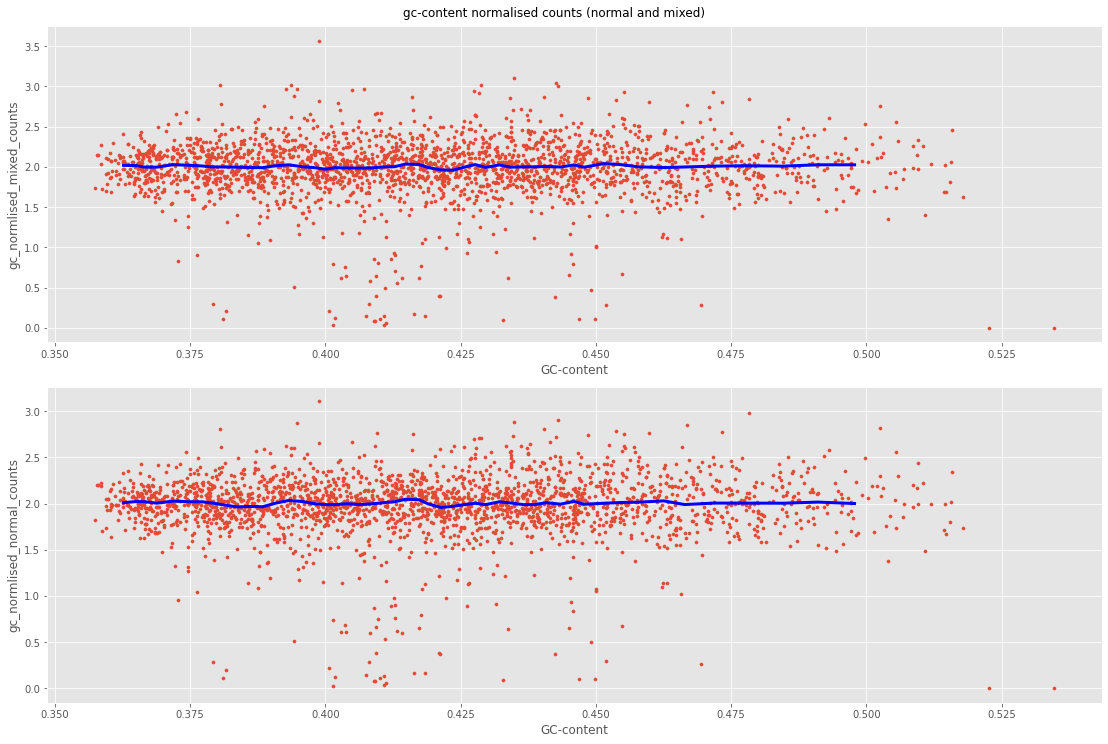

In [24]:
mixed_counts = []
cg_mixed = []
s  = copy_df.sort_values("GC_content",ignore_index=True)
for i in range (0,2450,50):
    mixed_counts.append(s.loc[(i-70):(i+70)].gc_normlised_mixed_counts.median())
    cg_mixed.append(s.loc[(i-70):(i+70)].GC_content.median())
    
normal_counts = []
cg_normal = []
for i in range (0,2450,50):
    normal_counts.append(s.loc[(i-70):(i+70)].gc_normalised_normal_counts.median())
    cg_normal.append(s.loc[(i-70):(i+70)].GC_content.median())
    
    
fig10, axs10 = plt.subplots(2)
fig10.suptitle('after GC-content normalisation (normal and mixed counts)')
axs10[0].scatter(copy_df['GC_content'], copy_df['gc_normlised_mixed_counts'],s = 10)
axs10[0].plot(cg_mixed, mixed_counts,color="b",linewidth=3.0)
axs10[1].scatter(copy_df['GC_content'], copy_df['gc_normalised_normal_counts'],s = 10)
axs10[1].plot(cg_normal, normal_counts,color="b",linewidth=3.0)

axs10[0].set(xlabel='GC-content', ylabel = 'gc_normlised_mixed_counts')
axs10[1].set(xlabel='GC-content', ylabel = 'gc_normlised_normal_counts')

plt.rcParams["figure.figsize"] = [15.50, 10.50]
plt.rcParams["figure.autolayout"] = True
plt.plot()


In [100]:
gc_counts = []
cg_norm_window = []
s  = copy_df.sort_values("GC_content",ignore_index=True)
for i in range (0,6000,100):
    gc_counts.append(s.loc[(i-70):(i+70)].gc_normlised_mixed_counts.median())
    cg_norm_window.append(s.loc[(i-70):(i+70)].GC_content.median())
    


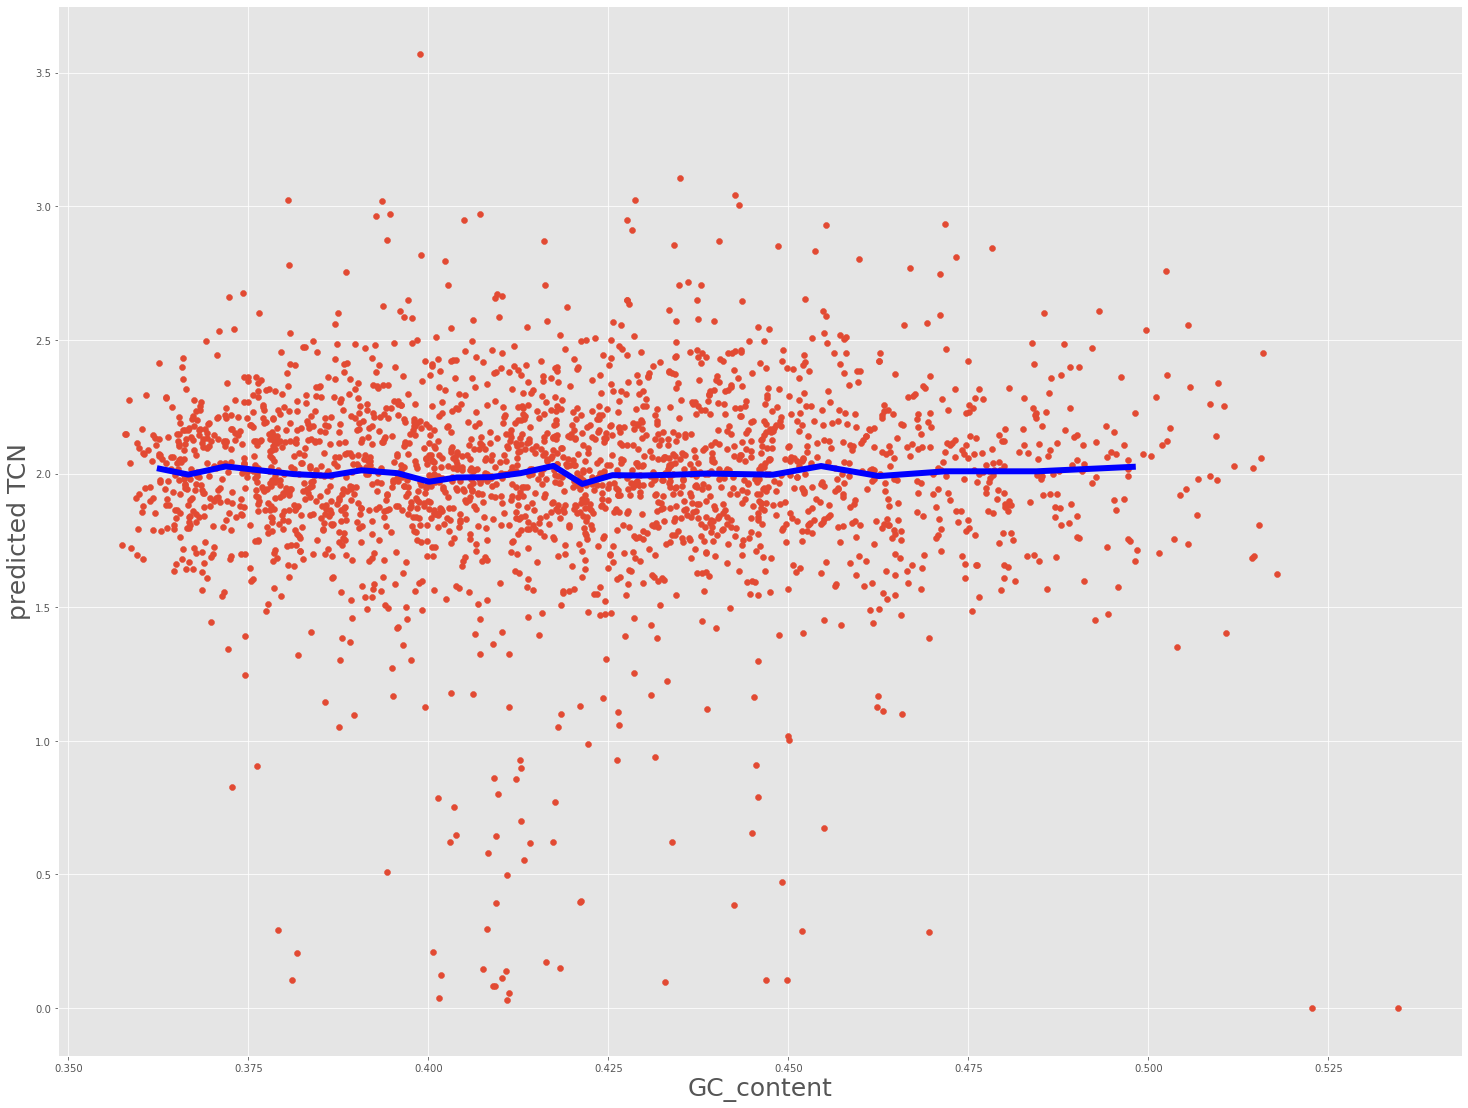

<Figure size 216x72 with 0 Axes>

In [101]:
fig5 = plt.scatter(copy_df['GC_content'],copy_df['gc_normlised_mixed_counts'])
plt.plot(cg_norm_window, gc_counts,color="b",linewidth=6.0)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('GC_content', size = 25)
plt.ylabel('predicted TCN', size = 25)
plt.figure(figsize=(3, 1))
plt.show()